In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-sales-data/sales_data_sample.csv


In [2]:
# Replace with the path you found above if it's different
file_path = '/kaggle/input/sample-sales-data/sales_data_sample.csv'

df = pd.read_csv(file_path, encoding='latin1')

# Now, let's do our two crucial checks
print("--- First 5 Rows ---")
print(df.head())

print("\n--- Column Info ---")
print(df.info())


--- First 5 Rows ---
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [4]:
# Create a list of columns we want to drop
columns_to_drop = [
    'ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY', 
    'PHONE', 'ADDRESSLINE1', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 
    'ORDERLINENUMBER'
]

# Drop the columns from our dataframe 'df'
df = df.drop(columns=columns_to_drop)

# Print the info again to confirm they are gone
print("--- Data after dropping columns ---")
df.info()

--- Data after dropping columns ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   SALES            2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   STATUS           2823 non-null   object 
 6   QTR_ID           2823 non-null   int64  
 7   MONTH_ID         2823 non-null   int64  
 8   YEAR_ID          2823 non-null   int64  
 9   PRODUCTLINE      2823 non-null   object 
 10  MSRP             2823 non-null   int64  
 11  PRODUCTCODE      2823 non-null   object 
 12  CUSTOMERNAME     2823 non-null   object 
 13  CITY             2823 non-null   object 
 14  COUNTRY          2823 non-null   object 
 15  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(6),

In [5]:
# Convert ORDERDATE from 'object' to 'datetime'
# pd.to_datetime is a powerful function that figures out the date format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Let's check our work. The Dtype for ORDERDATE should now be 'datetime64[ns]'
print("--- Data after fixing date ---")
df.info()

--- Data after fixing date ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2823 non-null   int64         
 1   QUANTITYORDERED  2823 non-null   int64         
 2   PRICEEACH        2823 non-null   float64       
 3   SALES            2823 non-null   float64       
 4   ORDERDATE        2823 non-null   datetime64[ns]
 5   STATUS           2823 non-null   object        
 6   QTR_ID           2823 non-null   int64         
 7   MONTH_ID         2823 non-null   int64         
 8   YEAR_ID          2823 non-null   int64         
 9   PRODUCTLINE      2823 non-null   object        
 10  MSRP             2823 non-null   int64         
 11  PRODUCTCODE      2823 non-null   object        
 12  CUSTOMERNAME     2823 non-null   object        
 13  CITY             2823 non-null   object        
 14  COUNTRY  

In [6]:
# Convert ORDERDATE to datetime, forcing any errors to become 'NaT' (null)
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Let's also check if any rows failed and became null
print("Number of rows with bad dates (if any):")
print(df['ORDERDATE'].isnull().sum())

Number of rows with bad dates (if any):
0


In [7]:
# Check the unique values in the 'STATUS' column
print("\n--- Unique STATUS values ---")
print(df['STATUS'].unique())

# Check the unique values in the 'COUNTRY' column
print("\n--- Unique COUNTRY values ---")
print(df['COUNTRY'].unique())

# Check the unique values in the 'PRODUCTLINE' column
print("\n--- Unique PRODUCTLINE values ---")
print(df['PRODUCTLINE'].unique())


--- Unique STATUS values ---
['Shipped' 'Disputed' 'In Process' 'Cancelled' 'On Hold' 'Resolved']

--- Unique COUNTRY values ---
['USA' 'France' 'Norway' 'Australia' 'Finland' 'Austria' 'UK' 'Spain'
 'Sweden' 'Singapore' 'Canada' 'Japan' 'Italy' 'Denmark' 'Belgium'
 'Philippines' 'Germany' 'Switzerland' 'Ireland']

--- Unique PRODUCTLINE values ---
['Motorcycles' 'Classic Cars' 'Trucks and Buses' 'Vintage Cars' 'Planes'
 'Ships' 'Trains']


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice default style for our plots
sns.set_style('whitegrid')

print("Plotting libraries imported.")

Plotting libraries imported.


In [9]:
# Create a new dataframe with ORDERDATE as the index
df_time = df.set_index('ORDERDATE')

# Resample the data by 'M' (Month-End frequency) and sum the SALES for each month
monthly_sales = df_time['SALES'].resample('ME').sum()

print("--- Total Sales per Month ---")
print(monthly_sales.head()) # Show the first 5 months of data

--- Total Sales per Month ---
ORDERDATE
2003-01-31    129753.60
2003-02-28    140836.19
2003-03-31    174504.90
2003-04-30    201609.55
2003-05-31    192673.11
Freq: ME, Name: SALES, dtype: float64


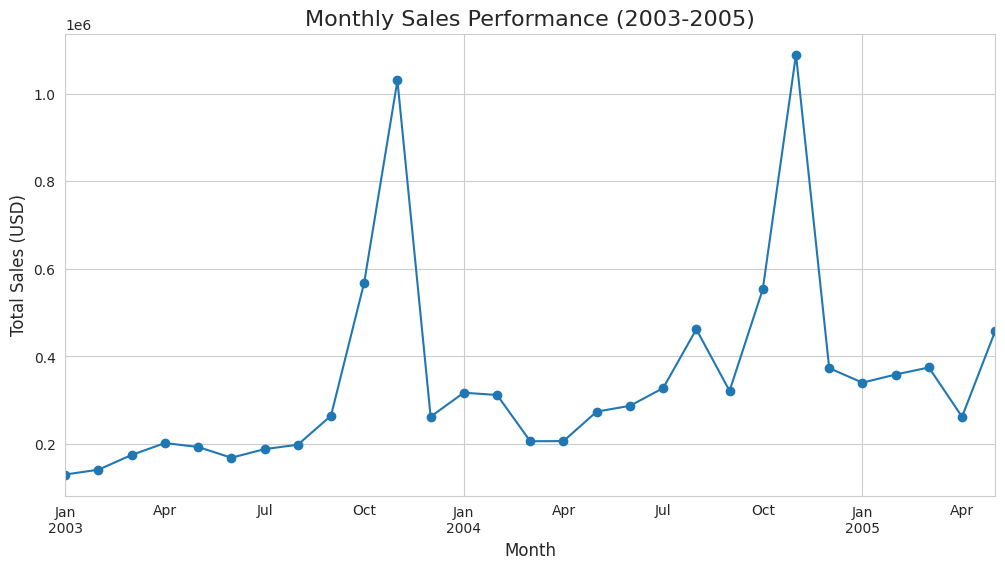

In [10]:
# Create a new plot
plt.figure(figsize=(12, 6)) # Make the plot bigger (12 inches wide, 6 inches tall)

# Plot a line chart of our monthly_sales data
monthly_sales.plot(kind='line', marker='o') # 'o' adds a dot for each data point

# Add a title and labels
plt.title('Monthly Sales Performance (2003-2005)', fontsize=16)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.grid(True) # Add a grid for easier reading

# Show the plot
plt.show()

## 1. Monthly Sales Performance

**Question:** What were the total sales and profits for each month? Is there a seasonality to our sales?

### Observation (The "What")
As the line chart above shows, the company's sales are highly seasonal. There is a consistent and significant sales peak every year in the fourth quarter (Q4), specifically in October and November. This is immediately followed by a sharp sales drop in the first quarter (Q1) of the new year.

### Insight (The "So What?")
This strong seasonal pattern suggests that sales are driven by the end-of-year holiday shopping season. The company relies heavily on this short period for a large portion of its annual revenue. The subsequent drop in Q1 is a predictable post-holiday slump.

### Recommendation (The "Now What?")
The business should base its operational strategy around this trend:
* **Inventory:** Stock levels must be at their highest by the end of Q3 (September) to meet the Q4 demand and should be reduced in Q1 to avoid holding excess, costly inventory.
* **Marketing:** Marketing campaigns and ad budgets should be concentrated in Q3 and early Q4 to maximize the holiday sales peak.

In [11]:
# Group by PRODUCTLINE and sum the SALES
product_sales = df.groupby('PRODUCTLINE')['SALES'].sum()

# Sort the results from highest to lowest to see the top sellers
product_sales = product_sales.sort_values(ascending=False)

print("--- Top Product Lines by Total Sales ---")
print(product_sales)

--- Top Product Lines by Total Sales ---
PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64


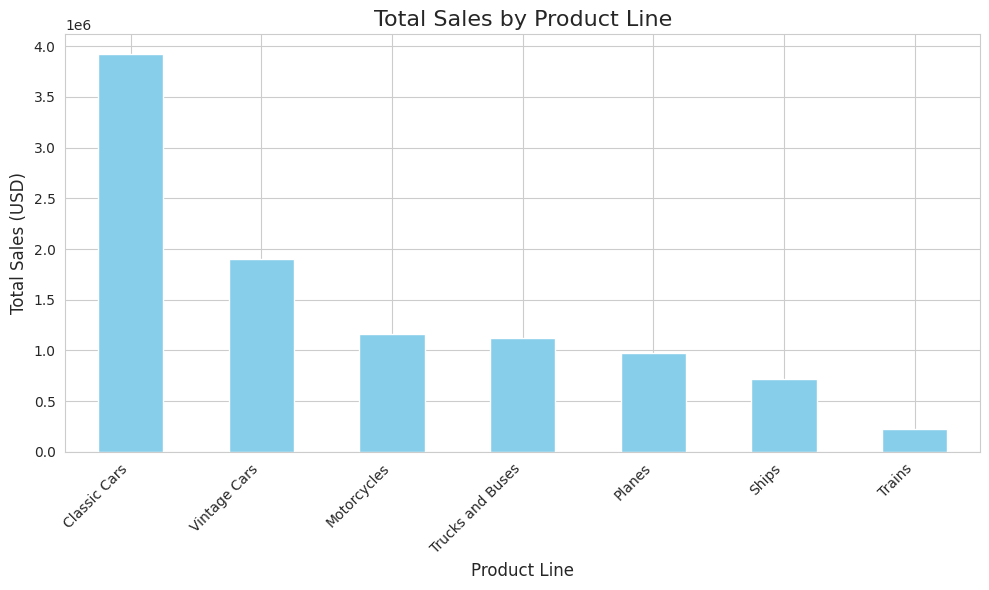

In [12]:
# Create a bar chart for product sales
plt.figure(figsize=(10, 6)) # Make the plot a bit wider

# Plot a bar chart
# 'color' adds some nice styling
product_sales.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Total Sales by Product Line', fontsize=16)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xlabel('Product Line', fontsize=12)

# Rotate the x-axis labels so they don't overlap
plt.xticks(rotation=45, ha='right')

# Make sure the labels fit in the plot
plt.tight_layout()

# Show the plot
plt.show()

## 2. Total Sales by Product Line

**Question:** Which products are the top-sellers by revenue?

### Observation (The "What")
The bar chart clearly shows that "Classic Cars" are the company's biggest revenue source by a large margin. "Motorcycles" and "Vintage Cars" are the second and third-best categories, but they generate significantly less revenue than Classic Cars. "Trains" and "Ships" are the lowest-performing categories.

### Insight (The "So What?")
The business is heavily dependent on "Classic Cars." While this category is performing well, it's also a risk. If the "Classic Cars" market sees a decline, the company's total revenue would be severely impacted. The other product lines are not currently strong enough to make up for such a loss.

### Recommendation (The "Now What?")
* **Protect the Core:** The company must ensure the "Classic Cars" product line remains healthy and well-stocked.
* **Diversify:** The marketing team should investigate ways to boost sales in the #2 and #3 categories ("Motorcycles" and "Vintage Cars"). A small increase in these areas could help diversify revenue and reduce risk.

In [13]:
# Group by COUNTRY and sum the SALES
country_sales = df.groupby('COUNTRY')['SALES'].sum()

# Sort the results from highest to lowest
country_sales = country_sales.sort_values(ascending=False)

# Get just the top 10 countries
top_10_countries = country_sales.head(10)

print("--- Top 10 Countries by Total Sales ---")
print(top_10_countries)

--- Top 10 Countries by Total Sales ---
COUNTRY
USA          3627982.83
Spain        1215686.92
France       1110916.52
Australia     630623.10
UK            478880.46
Italy         374674.31
Finland       329581.91
Norway        307463.70
Singapore     288488.41
Denmark       245637.15
Name: SALES, dtype: float64


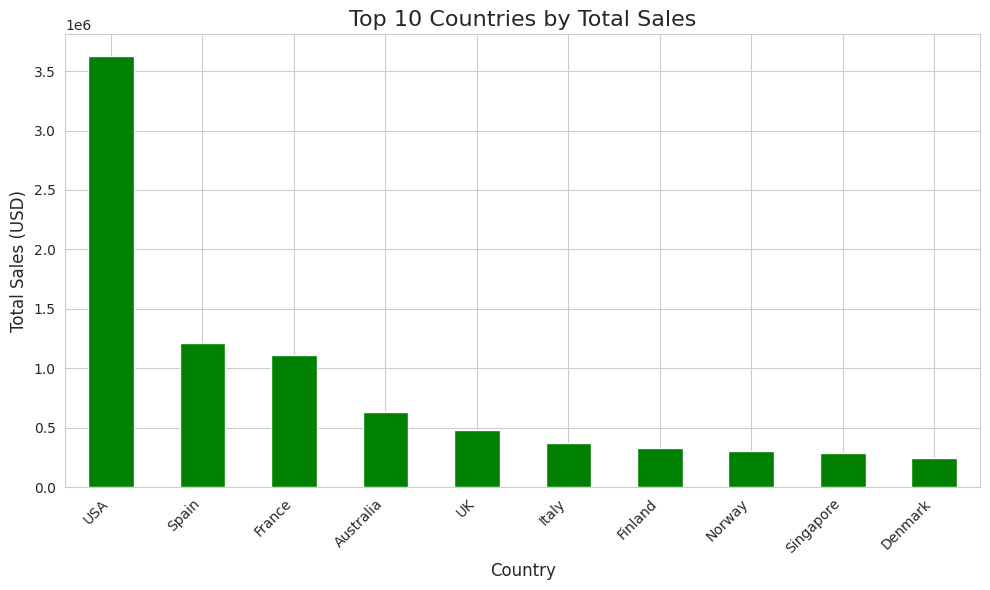

In [14]:
# Create a bar chart for the top 10 countries
plt.figure(figsize=(10, 6))

# Plot a bar chart
# Let's use a different color this time
top_10_countries.plot(kind='bar', color='green')

# Add title and labels
plt.title('Top 10 Countries by Total Sales', fontsize=16)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xlabel('Country', fontsize=12)

# Rotate the x-axis labels so they don't overlap
plt.xticks(rotation=45, ha='right')

# Make sure the labels fit in the plot
plt.tight_layout()

# Show the plot
plt.show()

## 3. Top 10 Countries by Sales

**Question:** Which countries are our most valuable markets?

### Observation (The "What")
The bar chart shows that the **USA** is, by an enormous margin, the company's largest market. The second- and third-largest markets (likely "France" and "Australia") are also strong but generate only a fraction of the revenue that the USA does. The sales are highly concentrated in the top 3-4 countries.

### Insight (The "So What?")
Similar to our product line analysis, the company is heavily **dependent on a single market: the USA**. This is a significant risk. Any economic downturn, new competitor, or change in shipping regulations in the USA could critically harm the business.

### Recommendation (The "Now What?")
* **Protect the Core:** The USA market must be the top priority for the sales and marketing teams.
* **Diversify for Growth:** The company should identify the next 2-3 countries (e.g., "France," "Australia," "UK") and create small, targeted marketing campaigns to see if they can grow sales there. This will help diversify revenue and reduce the risk of being so reliant on one country.

In [15]:

# Create a new dataframe called 'df_usa' that only contains rows where COUNTRY is 'USA'
df_usa = df[df['COUNTRY'] == 'USA'].copy()

# Check to make sure it worked
print("--- Data for USA Only ---")
print(df_usa.head())


--- Data for USA Only ---
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH    SALES  ORDERDATE   STATUS  \
0        10107               30      95.70  2871.00 2003-02-24  Shipped   
3        10145               45      83.26  3746.70 2003-08-25  Shipped   
4        10159               49     100.00  5205.27 2003-10-10  Shipped   
5        10168               36      96.66  3479.76 2003-10-28  Shipped   
8        10201               22      98.57  2168.54 2003-12-01  Shipped   

   QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP PRODUCTCODE  \
0       1         2     2003  Motorcycles    95    S10_1678   
3       3         8     2003  Motorcycles    95    S10_1678   
4       4        10     2003  Motorcycles    95    S10_1678   
5       4        10     2003  Motorcycles    95    S10_1678   
8       4        12     2003  Motorcycles    95    S10_1678   

               CUSTOMERNAME           CITY COUNTRY DEALSIZE  
0         Land of Toys Inc.            NYC     USA    Small  
3         Toys4Grown

In [16]:
# Group the USA data by PRODUCTLINE and sum the SALES
usa_product_sales = df_usa.groupby('PRODUCTLINE')['SALES'].sum()

# Sort the results from highest to lowest
usa_product_sales = usa_product_sales.sort_values(ascending=False)

print("--- Top Product Lines by Total Sales (USA) ---")
print(usa_product_sales)

--- Top Product Lines by Total Sales (USA) ---
PRODUCTLINE
Classic Cars        1344638.22
Vintage Cars         757755.90
Motorcycles          520371.70
Trucks and Buses     397842.42
Planes               328432.89
Ships                209688.14
Trains                69253.56
Name: SALES, dtype: float64


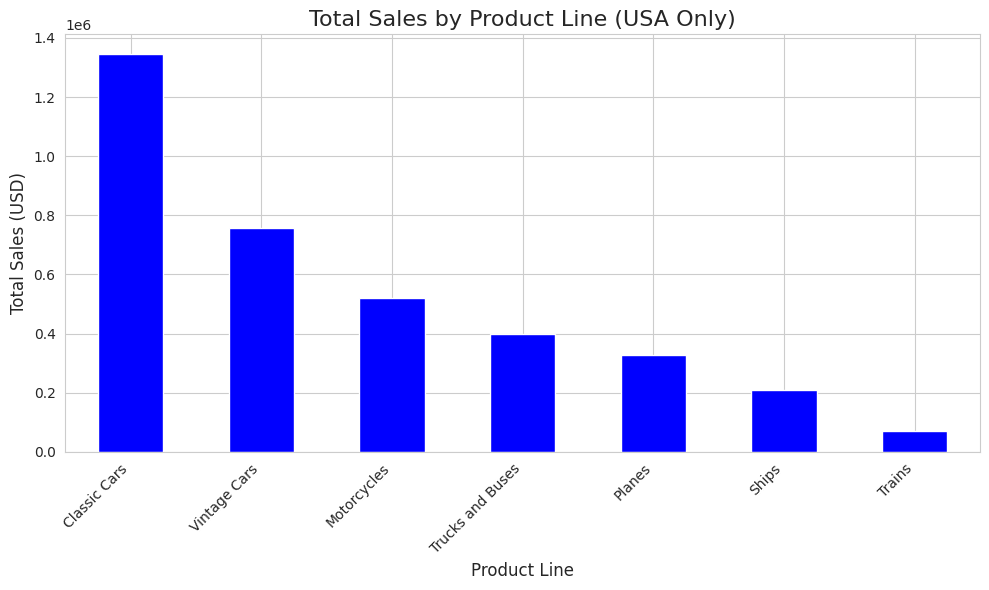

In [17]:
# Create a bar chart for the top products in the USA
plt.figure(figsize=(10, 6))

# Plot a bar chart
usa_product_sales.plot(kind='bar', color='blue') # Blue for USA

# Add title and labels
plt.title('Total Sales by Product Line (USA Only)', fontsize=16)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xlabel('Product Line', fontsize=12)

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# Make sure the labels fit
plt.tight_layout()

# Show the plot
plt.show()

## 4. Top-Selling Product Lines in the USA

**Question:** What are the top-selling product lines specifically in our most important market, the USA?

### Observation (The "What")
The bar chart shows that the product preferences in the USA mirror the company's overall sales. "Classic Cars" are the dominant product line, followed by "Vintage Cars" and "Motorcycles."

### Insight (The "So What?")
This confirms that the US market is the primary driver of the company's "Classic Car" success. The US marketing strategy for this product line is clearly working. This also means that our US-based marketing team has a "home-field advantage" and is the best-equipped to test new strategies.

### Recommendation (The "Now What?")
* **Double-Down:** The US marketing team should be given the budget to create targeted campaigns for the "Vintage Cars" and "Motorcycles" categories to see if they can grow these secondary markets.
* **Test & Learn:** Use the US market as a testbed for marketing campaigns. What works to sell more "Motorcycles" in the USA can then be applied to our other top 10 countries (like France, Australia, etc.).